### Data Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df_normal = pd.read_csv("SP1_new.csv")
df_fault = pd.read_csv("data_vfd_fault_synthetic.csv")

selected_features = ['Output Frequency', 'Output Current', 'Output Power', 
                     'Fin Temperature', 'Cooling Fin Temperature']

df_normal = df_normal[selected_features]
df_fault = df_fault[selected_features] 
df = pd.concat([df_normal, df_fault], ignore_index=True)

df

,Output Frequency,Output Current,Output Power,Fin Temperature,Cooling Fin Temperature
0,48.180000,82.050000,42.700000,32.000000,36.0
1,48.170000,80.860000,43.700000,32.000000,36.0
2,48.160000,82.140000,40.800000,32.000000,36.0
3,48.140000,82.670000,43.700000,32.000000,36.0
4,48.170000,86.770000,45.700000,32.000000,36.0
...,...,...,...,...,...
2971,48.169960,84.163310,43.387955,32.000000,37.0
2972,48.160110,84.493040,44.470090,31.999790,37.0
2973,48.169975,83.768990,42.145920,31.999979,37.0
2974,48.160114,86.277245,45.292835,31.999700,37.0


Text(0.5, 1.0, 'Hubungan Antara Output Frequency, Current, and Power terhadap Waktu')

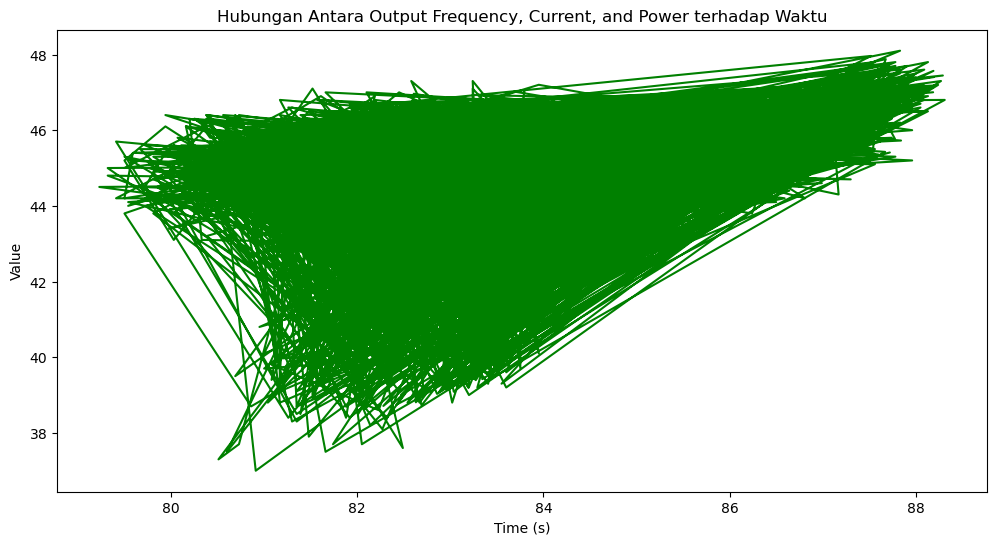

In [7]:
# Plot Output Frequency, Output Current, dan Output Power terhadap waktu
plt.figure(figsize=(12,6))
plt.plot(df['Output Current'], df['Output Power'], label='Output Frequency (Hz)', color='green')

plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Hubungan Antara Output Frequency, Current, and Power terhadap Waktu')

In [ ]:
'''
df_normal = pd.read_csv("SP1_new.csv")
df_fault = pd.read_csv("data_vfd_fault_synthetic.csv")

selected_features = ['Output Frequency', 'Output Current', 'Output Power', 
                     'Fin Temperature', 'Cooling Fin Temperature']

df_normal = df_normal[selected_features]
df_fault = df_fault[selected_features] 
df = pd.concat([df_normal, df_fault], ignore_index=True)

# Kolom baru
df['RPM Ref'] = df['Frequency Reference'] * 120 / 2
df['RPM Out'] = df['Output Frequency'] * 120 / 2
df['Power Factor'] = (df['Output Power'] * 1000) / (np.sqrt(3) * df['Output Voltage'] * df['Output Current'])
df['Slip (%)'] = (abs(df['RPM Out'] - df['RPM Ref']) / df['RPM Out']) * 100
df['Daya Semu (kVA)'] = (np.sqrt(3) * df['Output Voltage'] * df['Output Current']) / 1000
df['Efficiency (%)'] = 93.5
df['Daya Output Motor (kW)'] = (np.sqrt(3) * df['Output Voltage'] * df['Output Current'] * df['Efficiency (%)'] / 100 * df['Power Factor']) / 1000
df['Torque (Nm)'] = 9555*df['Daya Output Motor (kW)']/df['RPM Out']
df['Load'] = df['Torque (Nm)'] * np.pi * 2 * df['Output Frequency'] / df['Efficiency (%)']
df["Temperature (C)"] = df_thermal["Detected Number"]
df['Lifetime'] = 20000*2**((155-df["Temperature (C)"] - 40 - 10)/9.3)

df.head(100)

df'''

### Isolation Forest

In [95]:
df_if = df

# Pilih fitur yang digunakan untuk deteksi anomali
features = ['Output Frequency', 'Output Current', 'Output Power', 'Fin Temperature', 'Cooling Fin Temperature']
X_normal = df_if[features]

# Normalisasi data agar lebih stabil
scaler = StandardScaler()
X_normal_scaled = scaler.fit_transform(X_normal)

# Inisialisasi model Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)  # Asumsikan 5% data bisa jadi anomali
iso_forest.fit(X_normal_scaled)



IsolationForest(contamination=0.001, random_state=42)

In [96]:
# Normalisasi data baru agar sesuai dengan model
X_test_scaled = scaler.transform(df_if[features])

# Prediksi anomali (-1 = anomali, 1 = normal)
anomaly_labels = iso_forest.predict(X_test_scaled)

# Tambahkan hasil prediksi ke dataset
df_if["Anomaly"] = anomaly_labels

print(df_if["Anomaly"].value_counts())
df_if

Anomaly
 1    2973
-1       3
Name: count, dtype: int64


,Output Frequency,Output Current,Output Power,Fin Temperature,Cooling Fin Temperature,Anomaly
0,48.180000,82.050000,42.700000,32.000000,36.0,1
1,48.170000,80.860000,43.700000,32.000000,36.0,1
2,48.160000,82.140000,40.800000,32.000000,36.0,1
3,48.140000,82.670000,43.700000,32.000000,36.0,1
4,48.170000,86.770000,45.700000,32.000000,36.0,1
...,...,...,...,...,...,...
2971,48.169960,84.163310,43.387955,32.000000,37.0,1
2972,48.160110,84.493040,44.470090,31.999790,37.0,1
2973,48.169975,83.768990,42.145920,31.999979,37.0,1
2974,48.160114,86.277245,45.292835,31.999700,37.0,1


### Support Vector Machine

In [97]:
from sklearn.svm import OneClassSVM

df_svm = df
# Inisialisasi model One-Class SVM
oc_svm = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.001)  # nu menentukan persentase data yang dianggap anomali
oc_svm.fit(X_normal_scaled)

# Prediksi anomali pada data baru
anomaly_labels_svm = oc_svm.predict(X_test_scaled)

# Konversi label: One-Class SVM menghasilkan -1 (anomali) dan 1 (normal), kita samakan dengan Isolation Forest
df_svm["Anomaly_SVM"] = anomaly_labels_svm

# Tampilkan jumlah anomali yang ditemukan
print(df_svm["Anomaly_SVM"].value_counts())

df_svm

Anomaly_SVM
 1    2964
-1      12
Name: count, dtype: int64


,Output Frequency,Output Current,Output Power,Fin Temperature,Cooling Fin Temperature,Anomaly,Anomaly_SVM
0,48.180000,82.050000,42.700000,32.000000,36.0,1,1
1,48.170000,80.860000,43.700000,32.000000,36.0,1,1
2,48.160000,82.140000,40.800000,32.000000,36.0,1,1
3,48.140000,82.670000,43.700000,32.000000,36.0,1,1
4,48.170000,86.770000,45.700000,32.000000,36.0,1,1
...,...,...,...,...,...,...,...
2971,48.169960,84.163310,43.387955,32.000000,37.0,1,1
2972,48.160110,84.493040,44.470090,31.999790,37.0,1,1
2973,48.169975,83.768990,42.145920,31.999979,37.0,1,1
2974,48.160114,86.277245,45.292835,31.999700,37.0,1,1


### Model Comparation

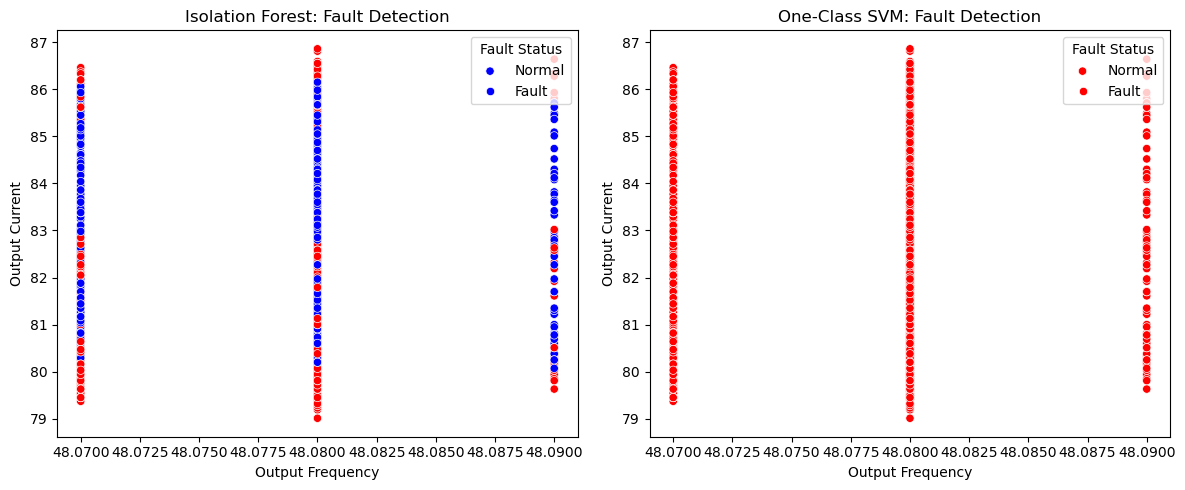

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Load dataset pengujian (yaskawa_train.CSV)
df_test = pd.read_csv("yaskawa_train.CSV")

# 🔹 Pastikan hanya mengambil fitur yang digunakan dalam model
features = ['Output Frequency', 'Output Current', 'Output Power', 'Fin Temperature', 'Cooling Fin Temperature']
df_toTest = df_test[features]

# 🔹 Normalisasi data pengujian agar sesuai dengan model
df_toTest_scaled = scaler.transform(df_toTest)

# 🔹 Prediksi dengan Isolation Forest (-1 = Fault, 1 = Normal)
prediction_iso = iso_forest.predict(df_toTest_scaled)
df_test["Isolation Forest Prediction"] = [1 if p == -1 else 0 for p in prediction_iso]  # 1 = Fault, 0 = Normal

# 🔹 Prediksi dengan One-Class SVM (-1 = Fault, 1 = Normal)
prediction_svm = oc_svm.predict(df_toTest_scaled)
df_test["One-Class SVM Prediction"] = [1 if p == -1 else 0 for p in prediction_svm]  # 1 = Fault, 0 = Normal

# 🔹 Simpan hasil ke CSV (Opsional)
df_test.to_csv("yaskawa_test_results.csv", index=False)

# 🔹 Visualisasi hasil prediksi
plt.figure(figsize=(12, 5))

# 🔹 Plot Isolation Forest
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_test["Output Frequency"], y=df_test["Output Current"], hue=df_test["Isolation Forest Prediction"], palette={0: "blue", 1: "red"})
plt.title("Isolation Forest: Fault Detection")
plt.xlabel("Output Frequency")
plt.ylabel("Output Current")
plt.legend(title="Fault Status", labels=["Normal", "Fault"], loc="upper right")

# 🔹 Plot One-Class SVM
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_test["Output Frequency"], y=df_test["Output Current"], hue=df_test["One-Class SVM Prediction"], palette={0: "blue", 1: "red"})
plt.title("One-Class SVM: Fault Detection")
plt.xlabel("Output Frequency")
plt.ylabel("Output Current")
plt.legend(title="Fault Status", labels=["Normal", "Fault"], loc="upper right")

# 🔹 Tampilkan grafik
plt.tight_layout()
plt.show()


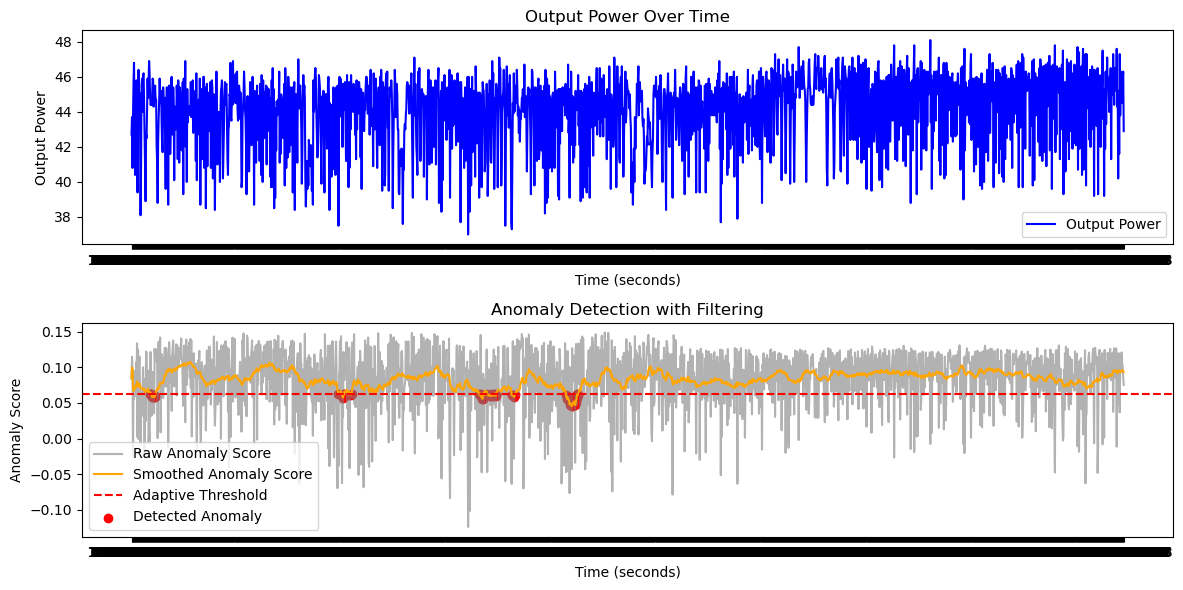

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("SP1_new.CSV")

# 🔹 3. Pilih Fitur untuk Anomaly Detection (tanpa load)
features = ["Output Frequency", "Output Current", "Output Power", "Fin Temperature", "Cooling Fin Temperature"]
X = df[features]

# 🔹 4. Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 5. Gunakan Isolation Forest untuk Deteksi Anomali
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)
df["Anomaly_Score"] = iso_forest.decision_function(X_scaled)
df["Anomaly"] = iso_forest.predict(X_scaled)  # -1 = anomaly, 1 = normal

# 🔹 6. Gunakan Moving Average untuk Mengurangi False Positives
window_size = 30  # Gunakan rata-rata 30 sampel sebelumnya
df["Smoothed_Anomaly_Score"] = df["Anomaly_Score"].rolling(window=window_size, min_periods=1).mean()

# 🔹 7. Gunakan Adaptive Threshold untuk Menyesuaikan Perubahan Dinamis
adaptive_threshold = df["Smoothed_Anomaly_Score"].mean() - 2 * df["Smoothed_Anomaly_Score"].std()
df["Filtered_Anomaly"] = (df["Smoothed_Anomaly_Score"] < adaptive_threshold).astype(int)

# 🔹 8. Plot Hasil Anomaly Detection
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df["Time"], df["Output Power"], label="Output Power", color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Output Power")
plt.title("Output Power Over Time")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df["Time"], df["Anomaly_Score"], label="Raw Anomaly Score", color="gray", alpha=0.6)
plt.plot(df["Time"], df["Smoothed_Anomaly_Score"], label="Smoothed Anomaly Score", color="orange")
plt.axhline(adaptive_threshold, color="red", linestyle="--", label="Adaptive Threshold")
plt.scatter(df["Time"][df["Filtered_Anomaly"] == 1], df["Smoothed_Anomaly_Score"][df["Filtered_Anomaly"] == 1], color="red", label="Detected Anomaly")
plt.xlabel("Time (seconds)")
plt.ylabel("Anomaly Score")
plt.title("Anomaly Detection with Filtering")
plt.legend()

plt.tight_layout()
plt.show()
